# COVID-19

## Visualizations

## Initial setup and fetching data

In [1]:
import c19
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

# Countries of interest
c2i = ["SWE", "NOR", "DNK", "ITA", "ESP", "CHE", "HUN"]

In [2]:
# Fetch COVID-19 data

url_c19 = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
c19df = pd.read_csv(url_c19)


In [3]:
# Get WB data

# SP.POP.TOTL ::: Total population is based on the de facto definition of population, which counts all residents 
# regardless of legal status or citizenship. The values shown are midyear estimates.

# SP.DYN.CDRT.IN ::: Crude death rate indicates the number of deaths occurring during the year, per 1,000 population
# estimated at midyear. Subtracting the crude death rate from the crude birth rate provides the rate of natural increase, 
# which is equal to the rate of population change in the absence of migration.

wb_indicators = ['SP.POP.TOTL', 'SP.DYN.CDRT.IN']
wbdf = c19.get_df_for_wb_countries_indicators(c2i, wb_indicators)



## Pre-processing

In [4]:
# Create a copy with the selected countries
c19_sel = c19df.loc[c19df['iso_code'].isin(c2i)].copy()

# Convert date column to datetime
c19_sel['date'] = pd.to_datetime(c19_sel['date'])

# Convert year column to numeric
wbdf['year'] = pd.to_numeric(wbdf['year'])

# Select last available data (2018)
wb18 = wbdf.loc[wbdf['year'] == 2018].copy()

# Estimate deaths (per year / per months / per day)
wb18['deaths_y'] = pd.to_numeric(wb18['SP.POP.TOTL'] * wb18['SP.DYN.CDRT.IN'] / 1000, errors='coerce')
wb18['deaths_m'] = pd.to_numeric(wb18['deaths_y'] / 12, errors='coerce')
wb18['deaths_d'] = pd.to_numeric(wb18['deaths_y'] / 365, errors='coerce')

## Visualizations

The below figures show the number of new deaths attributed to COVID-19. 

The red horizontal line indicates the estimated daily average deaths from 2018.


In [5]:
wb18

,country,year,SP.POP.TOTL,SP.DYN.CDRT.IN,deaths_y,deaths_m,deaths_d
CY,,,,,,,
SWE-2018,SWE,2018,10175214,9.1,92594.4474,7716.203950,253.683418
NOR-2018,NOR,2018,5311916,7.7,40901.7532,3408.479433,112.059598
DNK-2018,DNK,2018,5793636,9.5,55039.5420,4586.628500,150.793266
ITA-2018,ITA,2018,60421760,10.5,634428.4800,52869.040000,1738.160219
ESP-2018,ESP,2018,46796540,9.1,425848.5140,35487.376167,1166.708258
CHE-2018,CHE,2018,8513227,7.8,66403.1706,5533.597550,181.926495
HUN-2018,HUN,2018,9775564,13.4,130992.5576,10916.046467,358.883719


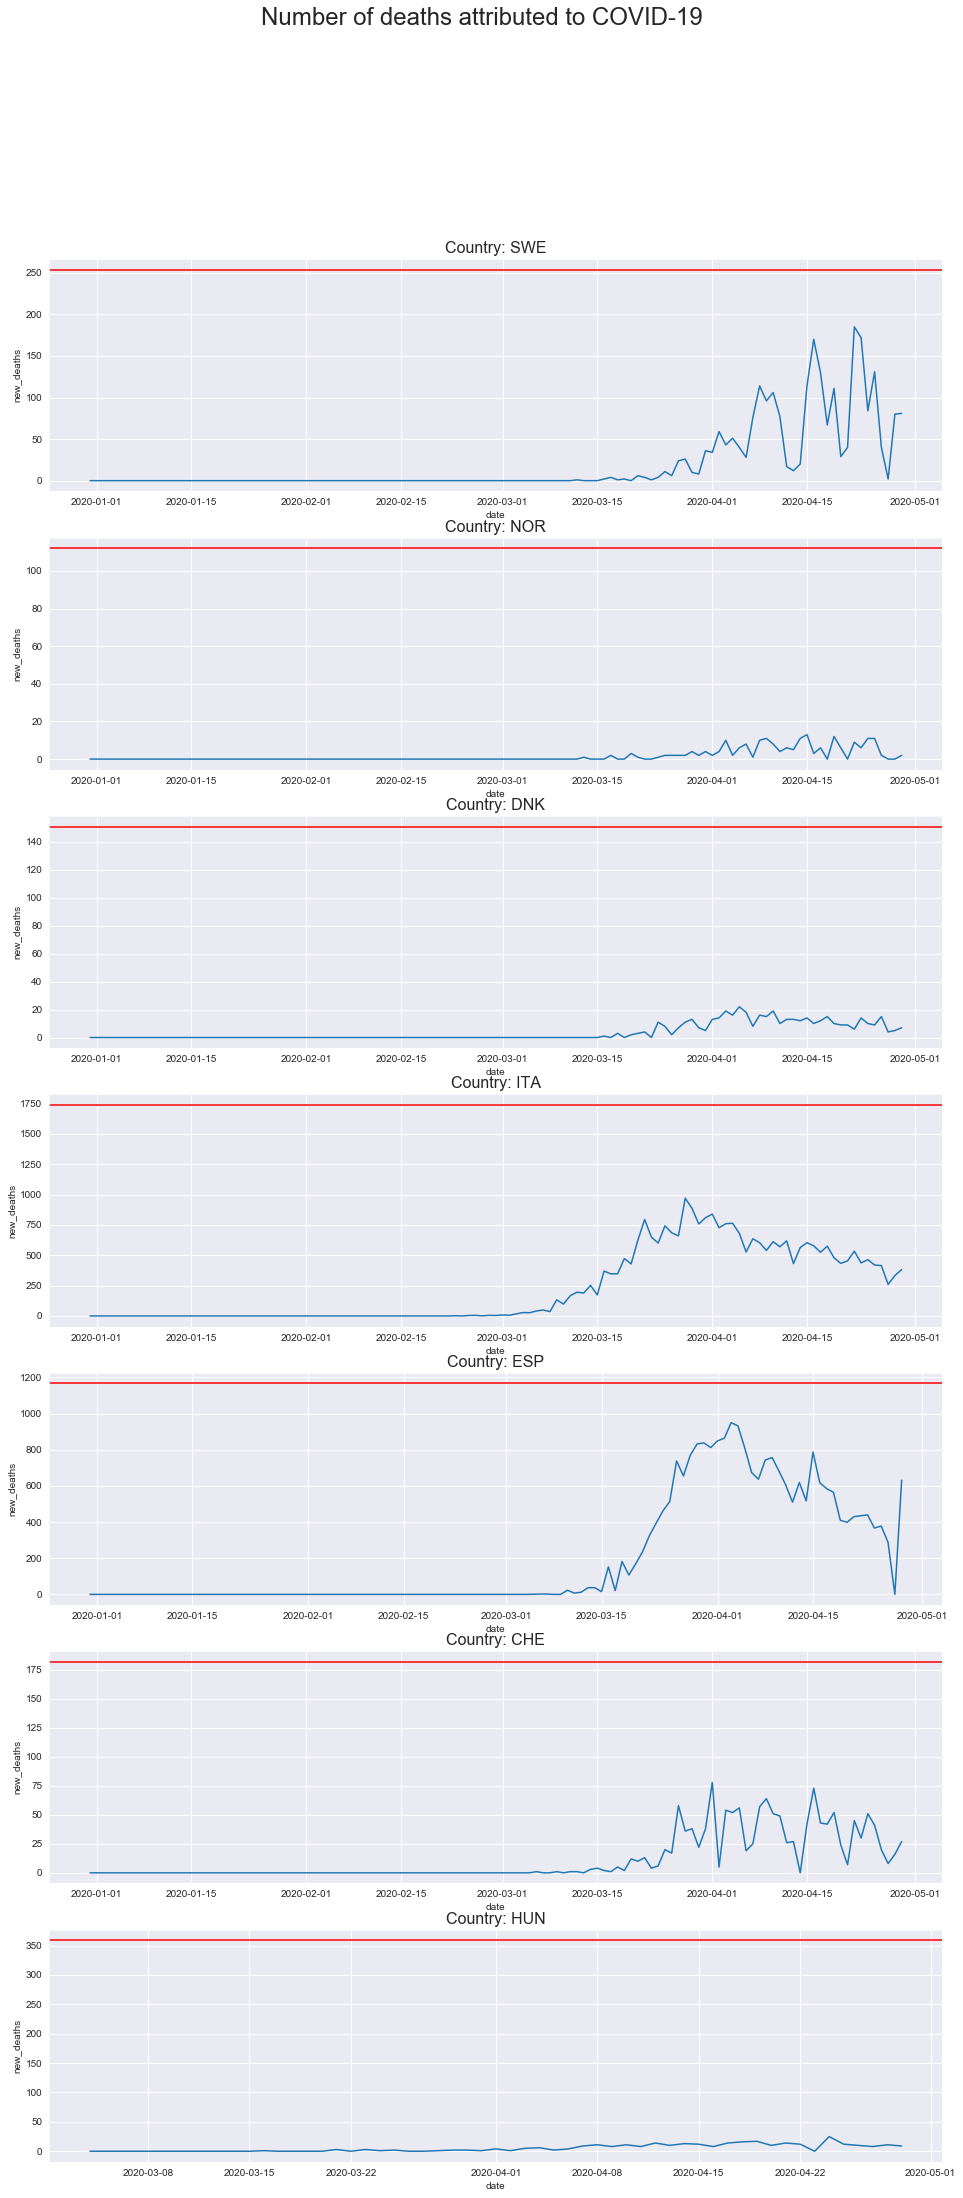

In [8]:
num = len(c2i)

sns.set_style("dark")

fig, axes = plt.subplots(nrows=num, figsize=(16, 5*num))
fig.suptitle('Number of deaths attributed to COVID-19', fontsize=24)

index = 0
for index in range(0, num):
    country_code = c2i[index]
    c19_country_data = c19_sel.loc[c19_sel['iso_code'] == country_code]
    wb_country_data = wb18.loc[wb18['country'] == country_code]
    wb_country_daily_avg = wb_country_data['deaths_d'].item()
    
    ax = axes[index]
    ax.grid(b=True, which='major', color='w', linewidth=1.0)
    ax.grid(b=True, which='minor', color='w', linewidth=0.5)
    
    g = sns.lineplot(x='date', y="new_deaths", data=c19_country_data, ax=ax)
    g.set_title('Country: {}'.format(country_code), fontsize=16)
    g.axhline(wb_country_daily_avg, color='r', label='avg')
    

plt.show()
